Name: Niketan Jivane
City: Pune
#Herman's Cancer Survival DataSet

It says that what is the probability that how many patients can survive more than 5 years or within 5 years of lifeline who had undergone surgery for breast cancer. This is the objective of finding it.

1) Information about Dataset
No. of data points-3(excluding class label)
no. of datasets-306
Class label- status

i)age- age of patient at the time of operation
ii)year_operation- patient's year at the time of operation
iii)axil_nodes- number of positive axil nodes detected(its biological term which gives idea about cancer)
iv)status- it shows status of patient's survival(1- survive more than 5 year, 2-survive within 5 year




In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore');

dataset=pd.read_csv('haberman.csv',header= None)
dataset.columns=['age','year','axil_nodes','status']


In [15]:
dataset.shape

(306, 4)

Observations:
There are 306 data points and 4 variables.

In [18]:
print(dataset.columns)

Index(['age', 'year', 'axil_nodes', 'status'], dtype='object')


Observations:
The column names are age, year, axil_nodes and status

In [19]:
dataset['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

Observations:
status having 1 are 225 and 2 having 81 patients.
i.e., 225 patients survived more than 5 years and 81 patinets survived within 5 years from collected datasets.

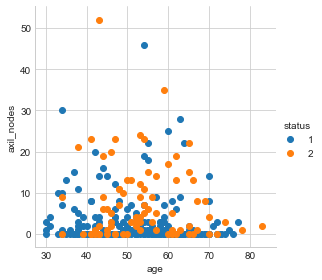

In [21]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset, hue="status",size=4)\
.map(plt.scatter, "age","axil_nodes")\
.add_legend();
plt.show();

In [25]:
print(dataset['age'].max())
print(dataset['age'].min())

print(dataset['year'].max())
print(dataset['year'].min())

print(dataset['axil_nodes'].max())
print(dataset['axil_nodes'].min())

83
30
69
58
52
0


Observations:
Here we observe that, age varies from 30 to 83
year of operations varies from 1958 to 1969
no of positive axil nodes from 0 to 52.

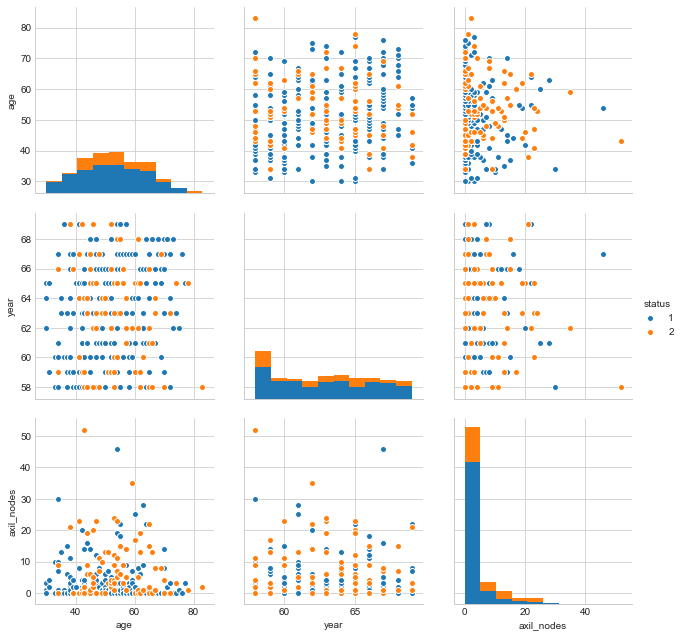

In [29]:
plt.close();
sns.set_style('whitegrid');
sns.pairplot(dataset,hue='status',vars=['age','year','axil_nodes'],size=3);
plt.show()

Observations:
1)As observe, graph with axil_node and year of patient looks some significant with linear distribution as compare to other 2 graphs.
2)As in other two graphs, data points are overlapped.

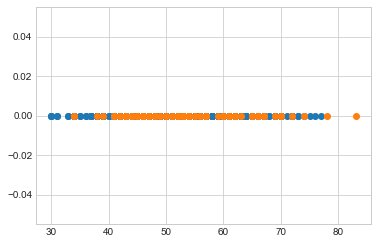

In [33]:
dataset_1=dataset.loc[dataset['status']==1];
dataset_2=dataset.loc[dataset['status']==2];
plt.plot(dataset_1['age'],np.zeros_like(dataset_1['age']),'o')
plt.plot(dataset_2['age'],np.zeros_like(dataset_2['age']),'o')
plt.show()

Observations:
As we see, two color class labels are overlapping, so very hard to analysis.

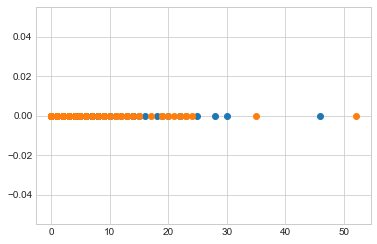

In [34]:
dataset_1=dataset.loc[dataset['status']==1];
dataset_2=dataset.loc[dataset['status']==2];
plt.plot(dataset_1['axil_nodes'],np.zeros_like(dataset_1['axil_nodes']),'o')
plt.plot(dataset_2['axil_nodes'],np.zeros_like(dataset_2['axil_nodes']),'o')
plt.show()

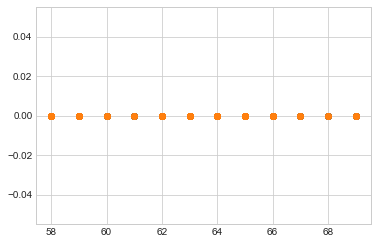

In [35]:
dataset_1=dataset.loc[dataset['status']==1];
dataset_2=dataset.loc[dataset['status']==2];
plt.plot(dataset_1['year'],np.zeros_like(dataset_1['year']),'o')
plt.plot(dataset_2['year'],np.zeros_like(dataset_2['year']),'o')
plt.show()

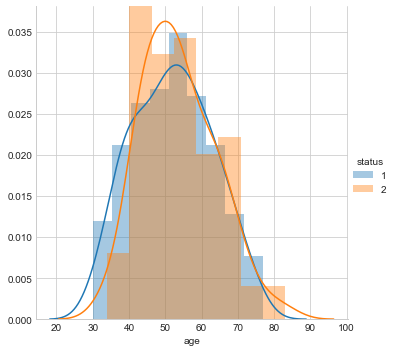

In [36]:
sns.FacetGrid(dataset, hue='status', size=5)\
    .map(sns.distplot, 'age')\
    .add_legend();
plt.show();

Observations:
1) age less tahn 40 have more chances to survive more than 5 years
2) age between  41 to 56, 65 to 70, and >77 chances to survive less than 5 years. 

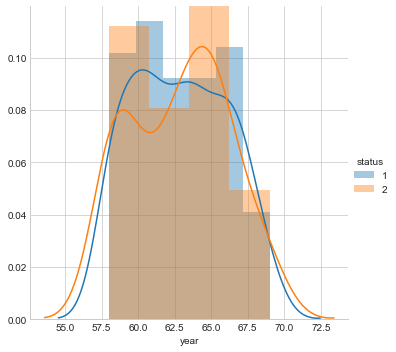

In [37]:
sns.FacetGrid(dataset, hue='status', size=5)\
    .map(sns.distplot, 'year')\
    .add_legend();
plt.show();

Observations:
1)year between 1958 to 1962 will survive more than 5 years
2)year between 1963 to 1966 will survive less than 5 years.

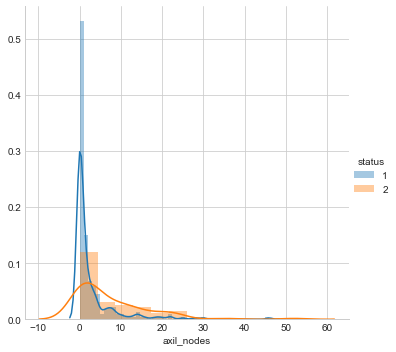

In [38]:
sns.FacetGrid(dataset, hue='status', size=5)\
    .map(sns.distplot, 'axil_nodes')\
    .add_legend();
plt.show();

Observations:
1)Axil node count less than 4 having patient chances to survive more than 5 years
2)axil node count more than 4 having patient have chances to survive less than 5 years

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


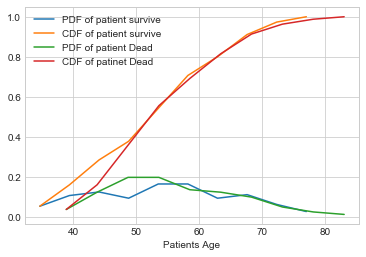

In [50]:
counts, bin_edges= np.histogram(dataset_1['age'],bins=10, density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF of patient survive')
plt.plot(bin_edges[1:],cdf, label='CDF of patient survive')


counts, bin_edges= np.histogram(dataset_2['age'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF of patient Dead')
plt.plot(bin_edges[1:],cdf, label='CDF of patinet Dead')
plt.legend()
plt.xlabel('Patients Age')

plt.show()

Observation:
1) Age <=48 patient have 39% chance to survive more than 5 years.
2) Age between 44 to 55 patient have 8% to 62% chance to survive less than 5 years 

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


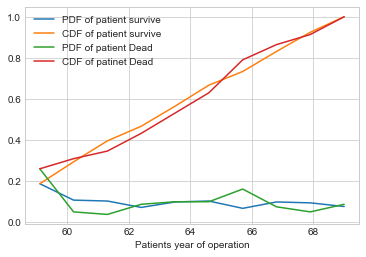

In [51]:
counts, bin_edges= np.histogram(dataset_1['year'],bins=10, density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF of patient survive')
plt.plot(bin_edges[1:],cdf, label='CDF of patient survive')


counts, bin_edges= np.histogram(dataset_2['year'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF of patient Dead')
plt.plot(bin_edges[1:],cdf, label='CDF of patinet Dead')
plt.legend()
plt.xlabel('Patients year of operation')

plt.show()

Observation:
1) Patient's year of operation in 1961 to 1965 have 32% to 65% chances to survive more than 5 years
2) Patient's year of operation in 1965 to 1967 have 70% to 90% chances to survive less than 5 years

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


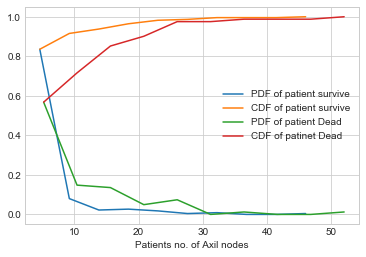

In [52]:
counts, bin_edges= np.histogram(dataset_1['axil_nodes'],bins=10, density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)

cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF of patient survive')
plt.plot(bin_edges[1:],cdf, label='CDF of patient survive')


counts, bin_edges= np.histogram(dataset_2['axil_nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='PDF of patient Dead')
plt.plot(bin_edges[1:],cdf, label='CDF of patinet Dead')
plt.legend()
plt.xlabel('Patients no. of Axil nodes')

plt.show()

Observation:
1) No. of positive axil nodes having 8 or less than 8 have 82% chances to survive more than 5 years
2) No. of positive axil nodes having more than 45 have 90 to 100% chances to survive less than 5 years
3) Overall, as max the no of axil nodes, more chance to survive less than 5 years.

In [69]:
print('Means:')
print('Mean of age who survived more than 5 yrs: {}'.format(np.mean(dataset_1["age"])))
print('Mean of age who survived less than 5 yrs: {}'.format(np.mean(dataset_2["age"])))
print("\n")
print('Mean of the year who undergon operation who survived more than 5 yrs: {}'.format(np.mean(dataset_1["year"])))
print('Mean of age the year who undergon operation who survived less than 5 yrs: {}'.format(np.mean(dataset_2["year"])))
print("\n")
print('Mean of no. of axil nodes who survived more than 5 yrs: {}'.format(np.mean(dataset_1["axil_nodes"])))
print('Mean of no. of axil nodes who survived less than 5 yrs: {}'.format(np.mean(dataset_2["axil_nodes"])))
print('\n')

print("Std dev: ")
print('Std dev of age who survived more than 5 yrs: {}'.format(np.std(dataset_1["age"])))
print('Std dev of age who survived less than 5 yrs: {}'.format(np.std(dataset_2["age"])))
print('\n')
print('Std dev of the year who undergon operation who survived more than 5 yrs: {}'.format(np.std(dataset_1["year"])))
print('Std dev of the year who undergon operation who survived less than 5 yrs: {}'.format(np.std(dataset_2["year"])))
print('\n')
print('Std dev of axil nodes who survived more than 5 yrs: {}'.format(np.std(dataset_1["axil_nodes"])))
print('Std dev of axil nodes who survived less than 5 yrs: {}'.format(np.std(dataset_2["axil_nodes"])))

Means:
Mean of age who survived more than 5 yrs: 52.01777777777778
Mean of age who survived less than 5 yrs: 53.67901234567901


Mean of the year who undergon operation who survived more than 5 yrs: 62.86222222222222
Mean of age the year who undergon operation who survived less than 5 yrs: 62.82716049382716


Mean of no. of axil nodes who survived more than 5 yrs: 2.7911111111111113
Mean of no. of axil nodes who survived less than 5 yrs: 7.45679012345679


Std dev: 
Std dev of age who survived more than 5 yrs: 10.98765547510051
Std dev of age who survived less than 5 yrs: 10.10418219303131


Std dev of the year who undergon operation who survived more than 5 yrs: 3.2157452144021956
Std dev of the year who undergon operation who survived less than 5 yrs: 3.3214236255207883


Std dev of axil nodes who survived more than 5 yrs: 5.857258449412131
Std dev of axil nodes who survived less than 5 yrs: 9.128776076761632


In [70]:
print("\nMedians:")
print('Median of age who survived more than 5 yrs: {}'.format(np.median(dataset_1["age"])))
print('Median of age who survived less than 5 yrs: {}'.format(np.median(dataset_2["age"])))
print('\n')
print('Median of the year who undergon operation who survived more than 5 yrs: {}'.format(np.median(dataset_1["year"])))
print('Median of the year who undergon operation who survived less than 5 yrs: {}'.format(np.median(dataset_2["year"])))
print('\n')
print('Median of no. of axil nodes who survived more than 5 yrs: {}'.format(np.median(dataset_1["axil_nodes"])))
print('Median of no. of axil nodes who survived less than 5 yrs: {}'.format(np.median(dataset_2["axil_nodes"])))


Medians:
Median of age who survived more than 5 yrs: 52.0
Median of age who survived less than 5 yrs: 53.0


Median of the year who undergon operation who survived more than 5 yrs: 63.0
Median of the year who undergon operation who survived less than 5 yrs: 63.0


Median of no. of axil nodes who survived more than 5 yrs: 0.0
Median of no. of axil nodes who survived less than 5 yrs: 4.0


Observations:
1) Most of the patient who having no. of + axil nodes more than 8, they survievd less than 5 yrs 

In [76]:
print("\nQuantiles:")
print('Quantiles of ages who survive more than 5 yrs: {}'.format(np.percentile(dataset_1["age"],np.arange(0, 100, 25))))
print('Quantiles of ages who survive less than 5 yrs: {}'.format(np.percentile(dataset_2["age"],np.arange(0, 100, 25))))
print('\n')
print('Quantiles of year of operation who survive more than 5 yrs: {}'.format(np.percentile(dataset_1["year"],np.arange(0, 100, 25))))
print('Quantiles of year of operation who survive less than 5 yrs: {}'.format(np.percentile(dataset_2["year"],np.arange(0, 100, 25))))
print('\n')
print('Quantiles of no of axil nodes who survive more than 5 yrs: {}'.format(np.percentile(dataset_1["axil_nodes"],np.arange(0, 100, 25))))
print('Quantiles of no of axil nodes who survive less than 5 yrs: {}'.format(np.percentile(dataset_1["axil_nodes"],np.arange(0, 100, 25))))
print('\n')
print("\n90th Percentiles:")
print('90th percentile of age who survive more than 5 yrs: {}'.format(np.percentile(dataset_1["age"],90)))
print('90th percentile of age who survive less than 5 yrs: {}'.format(np.percentile(dataset_2["age"],90)))
print('90th percentile of year of operation who survive more than 5 yrs: {}'.format(np.percentile(dataset_1["year"],90)))
print('90th percentile of year of operation who survive less than 5 yrs: {}'.format(np.percentile(dataset_2["year"],90)))
print('90th percentile of no of axil nodes who survive more than 5 yrs: {}'.format(np.percentile(dataset_1["axil_nodes"],90)))
print('90th percentile of no of axil nodes who survive less than 5 yrs: {}'.format(np.percentile(dataset_2["axil_nodes"],90)))


Quantiles:
Quantiles of ages who survive more than 5 yrs: [30. 43. 52. 60.]
Quantiles of ages who survive less than 5 yrs: [34. 46. 53. 61.]


Quantiles of year of operation who survive more than 5 yrs: [58. 60. 63. 66.]
Quantiles of year of operation who survive less than 5 yrs: [58. 59. 63. 65.]


Quantiles of no of axil nodes who survive more than 5 yrs: [0. 0. 0. 3.]
Quantiles of no of axil nodes who survive less than 5 yrs: [0. 0. 0. 3.]



90th Percentiles:
90th percentile of age who survive more than 5 yrs: 67.0
90th percentile of age who survive less than 5 yrs: 67.0
90th percentile of year of operation who survive more than 5 yrs: 67.0
90th percentile of year of operation who survive less than 5 yrs: 67.0
90th percentile of no of axil nodes who survive more than 5 yrs: 8.0
90th percentile of no of axil nodes who survive less than 5 yrs: 20.0


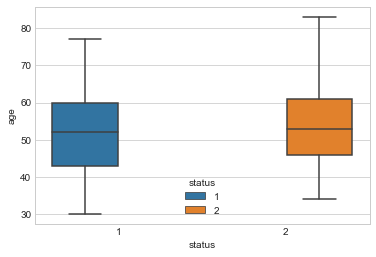

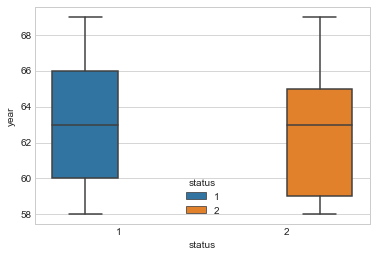

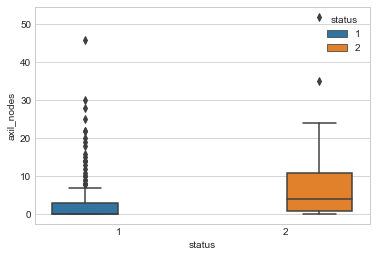

In [86]:
sns.boxplot(x='status',y='age',hue='status', data=dataset)
plt.show()
sns.boxplot(x='status',y='year',hue='status', data=dataset)
plt.show()
sns.boxplot(x='status',y='axil_nodes',hue='status', data=dataset)
plt.show()

Observations:
1) Patients having age < 35 yrs are surely survive more than 5 yrs.
2) Patients having age > 78 yrs are surely survive less than 5 yrs.
3) Out of 50% of Patients who survive for more than 5 years: 25% patients operation year 1960-63 and other 25% of patients having operation year 1963-66.
4) Out of 50% of Patients who were survive less than 5 years: 25% patients operation year 1959-63 and other 25% of patients having operation year 1963-65.
5) 25% of Patients having axil nodes= 3 survive more than 5 years.
6) More than 25% of Patients having axil nodes >= 4 survive less than 5 years.

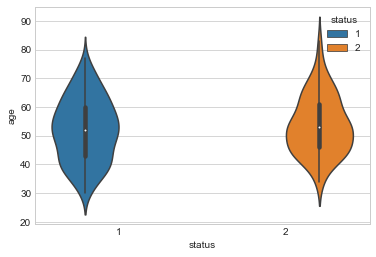

In [88]:
sns.violinplot(x="status", y="age", hue='status',data=dataset, size=8)
plt.show()

Observation:
1) Age greater than 85 yrs survive less than 5 yrs.

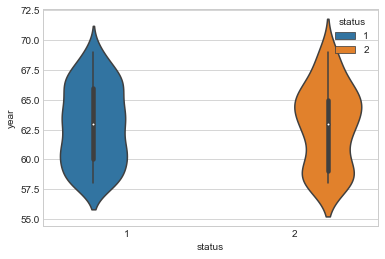

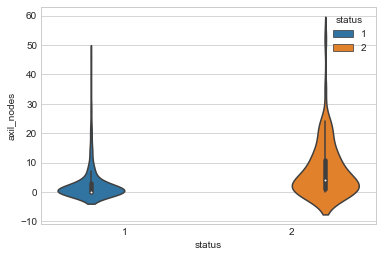

In [90]:
sns.violinplot(x="status", y="year", hue='status',data=dataset, size=8)
plt.show()

sns.violinplot(x="status", y="axil_nodes", hue='status',data=dataset, size=8)
plt.show()

Observations:
1) Axil nodes <=8 survive more than 5 yrs
2) Axil nodes >50 will surely survive less than 5 yrs.

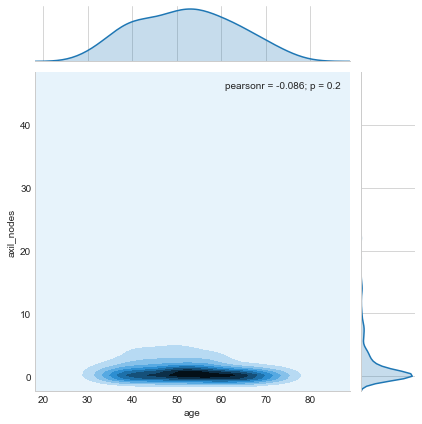

In [96]:
sns.jointplot(x="age", y="axil_nodes", data=dataset_1, kind="kde");
plt.show();

Observations:
1) Patient's age between 40 to 65 and axil nodes between 0-4 survive more than 5 yrs

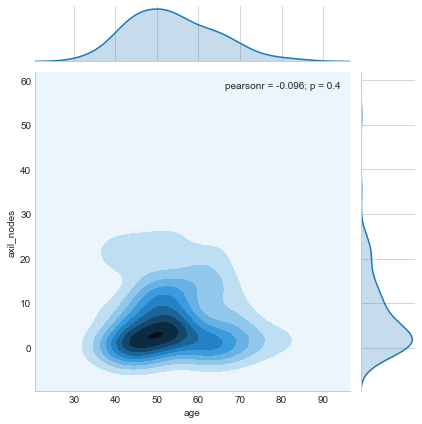

In [97]:
sns.jointplot(x="age", y="axil_nodes", data=dataset_2, kind="kde");
plt.show();

Final Observations:

Main observation is that, dataset is imbalanced.

1) From the pair plot we able to understand the patient age and axil nodes are important features to derive the significant insights to determine patient's survival status.
2) If patient has more than 8 axil nodes and operation year 1965-67, then surely, they will survive less than 5 years.
3) If patient has less than 8 axil nodes and operation year 1961-65, then more chances they will survive more than 5 years.
4) Patients with age < 35 yrs and axil nodes less than 8 will be able to survive more than 5 years.
5) Patients with > 50 axil nodes surely survive less than 5 years.
6) Patients chances to survive is less when their age lies in intervals 41-51 yrs, 64-70 yrs, or > 78 yrs.
7) Patients chances to survive more than 5 years when their age <= 40 yrs.
8) Patients chances to survive more than 5 years having year of operation between 1958-62.
9) Patients having age 40-66 yrs and 0-5 axil nodes have survived more than 5 years.

In [ ]:
if (axil_nodes between 0-5 and age between 40-66 yrs): 
    print("patient will surely survive more than 5 yrs)
else if (axil_nodes <=8 and (year between 1961-65 OR age <= 40 yrs) ): 
    print("patient will survive more than 5 yrs)
else if (axil_nodes >50): 
    print("patient will surely survive less than 5 yrs)
else if ((axil_nodes >8 and axil_nodes <= 50) and year between 1965 and 1967): 
    print("patient will survive less than 5 yrs)